<a href="https://colab.research.google.com/github/pat-ch0/DataScience-intro/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement des données MNIST

Ce bloc de code charge le jeu de données MNIST, une collection d'images de chiffres manuscrits largement utilisée pour l'apprentissage automatique.

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


# Préparation des données

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

1. `train_images = train_images.reshape((60000, 28 * 28))` redimensionne `train_images`. Le jeu de données MNIST contient 60 000 images d'entraînement, chacune étant initialement une matrice 28x28 pixels. Cette ligne transforme chaque image en un vecteur de 784 éléments (28 * 28). Cela est nécessaire car les réseaux de neurones prennent généralement des vecteurs en entrée.
2. `train_images = train_images.astype('float32') / 255` convertit le type de données de `train_images` en `float32` et divise chaque valeur de pixel par 255. Cela normalise les valeurs des pixels pour qu'elles soient comprises entre 0 et 1, ce qui facilite l'apprentissage du modèle.
3. `test_images = test_images.reshape((10000, 28 * 28))`: Similaire à l'étape 1, mais pour les 10 000 images de test.
4. `test_images = test_images.astype('float32') / 255`: Similaire à l'étape 2, mais pour les images de test.

`train_labels = to_categorical(train_labels)`: Ici, nous appliquons la fonction `to_categorical` à train_labels. Cela transforme les `train_labels` d'une simple liste de nombres (représentant le chiffre dans chaque image) en un format « one-hot encoded ».

Qu'est-ce que le one-hot encoding ? Imaginez que vous ayez 10 catégories (chiffres 0 à 9). Le one-hot encoding crée un vecteur de 10 éléments pour chaque étiquette. Si l'étiquette est 5, le vecteur aura un '1' à la 5ème position et '0' partout ailleurs : `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`. Cette représentation est plus adaptée à l'apprentissage du réseau neuronal.

# Defining the network

Ce bloc de code définit l'architecture du réseau neuronal qui sera utilisé pour la classification des images MNIST.

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

1. `from keras import models` et `from keras import layers` importent les modules nécessaires de Keras pour créer et manipuler des modèles et des couches de réseaux de neurones.

*  `models` : Contient des fonctions pour définir différents types de modèles, ici on utilise `Sequential` qui permet de créer un réseau neuronal avec des couches empilées séquentiellement.
*  `layers` : Contient des fonctions pour définir différents types de couches de neurones, ici on utilise `Dense` qui représente une couche entièrement connectée.
2.  `network = models.Sequential()` crée un objet `Sequential` et le stocke dans la variable `network`. Cela initialise un modèle de réseau neuronal vide auquel on ajoutera des couches par la suite. Imaginez que vous construisez une tour de Lego, `Sequential` est la base sur laquelle vous allez empiler les briques.

3. `network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))` ajoute la première couche au réseau neuronal.

*  `layers.Dense(...)` : Définit une couche **Dense**, ce qui signifie que chaque neurone de cette couche est connecté à tous les neurones de la couche précédente. C'est la "brique" principale de notre réseau neuronal.
*  `512` : Spécifie le nombre de neurones dans cette couche. Plus de neurones peuvent permettre au réseau d'apprendre des motifs plus complexes, mais augmentent aussi la complexité du modèle.
*  `activation='relu'` : Définit la **fonction d'activation** `relu` (Rectified Linear Unit) pour cette couche. La fonction d'activation détermine comment les neurones réagissent aux informations qu'ils reçoivent. `relu` est une fonction d'activation courante qui introduit une non-linéarité dans le réseau, lui permettant d'apprendre des relations plus complexes entre les données.
*  `input_shape=(28 * 28,)` : Spécifie la forme des données d'entrée du réseau. Ici, on indique que chaque entrée sera un vecteur de 784 éléments (28 pixels x 28 pixels), correspondant à une image MNIST aplatie. C'est la forme de la "brique" d'entrée de notre réseau neuronal.
4. `network.add(layers.Dense(10, activation='softmax'))` ajoute la deuxième et dernière couche au réseau neuronal.

*  `layers.Dense(10, ...)` : Définit une autre couche **Dense** avec 10 neurones. Ce nombre correspond au nombre de classes que l'on veut prédire (les chiffres de 0 à 9).
*  `activation='softmax'` : Définit la fonction d'activation `softmax` pour cette couche. `softmax` convertit les sorties du réseau en une distribution de probabilité sur les 10 classes. Cela permet au réseau de prédire la probabilité que l'image d'entrée appartienne à chaque classe.
En résumé, ce code définit un réseau neuronal simple avec deux couches : une couche cachée avec 512 neurones et une fonction d'activation relu, et une couche de sortie avec 10 neurones et une fonction d'activation softmax. Ce type de réseau est appelé un perceptron multicouche et est couramment utilisé pour des tâches de classification. J'espère que cela est plus clair !

# Defining the optimizer and the loss

In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Cette ligne de code configure le processus d'apprentissage du réseau de neurones en définissant la méthode d'optimisation des poids (rmsprop), la façon de mesurer l'erreur du modèle (categorical_crossentropy) et les indicateurs de performance à suivre (accuracy).

1. `optimizer='rmsprop'` définit l'optimiseur qui sera utilisé pour ajuster les poids du réseau pendant l'apprentissage.

  *  `rmsprop` est un algorithme d'optimisation populaire qui adapte le taux d'apprentissage pour chaque poids individuellement. Il est souvent efficace pour les réseaux de neurones profonds.
  *  Imaginez que vous essayez de descendre une montagne dans le brouillard. L'optimiseur est comme votre stratégie pour choisir la direction à prendre. rmsprop est une stratégie qui prend en compte la pente du terrain à votre position actuelle et ajuste vos pas en conséquence.
2. `loss='categorical_crossentropy'` spécifie la **fonction de perte**, qui mesure la différence entre les prédictions du modèle et les vraies valeurs. Le but de l'apprentissage est de minimiser cette perte.
  *  `categorical_crossentropy` est couramment utilisée pour les problèmes de classification multiclasse (où il y a plus de deux catégories possibles), comme la classification des chiffres MNIST (0 à 9). Elle compare la distribution de probabilité prédite par le modèle à la distribution réelle des étiquettes.
  *  La fonction de perte est comme un baromètre qui indique à quel point vous êtes loin du fond de la montagne (votre objectif). `categorical_crossentropy` mesure cette distance en comparant vos prédictions aux vraies valeurs.
3. `metrics=['accuracy']` définit les métriques utilisées pour évaluer les performances du modèle pendant et après l'apprentissage.
  *  `accuracy` (précision) est une métrique standard qui calcule le pourcentage de prédictions correctes.
  *  Les métriques sont comme des panneaux indicateurs qui vous donnent une idée de votre progression vers le fond de la montagne. accuracy vous indique le pourcentage du chemin que vous avez parcouru correctement.

## Entrainer le réseau

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.2585 - acc: 0.9250
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.1041 - acc: 0.9680
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0685 - acc: 0.9792
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0491 - acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.0369 - acc: 0.9890


1. `network.fit()` démarre l'entraînement du modèle `network`. On peut imaginer `network` comme un élève qui doit apprendre à identifier les chiffres. `fit()` est comme le professeur qui va lui enseigner.
2. `train_images` sont les données d'entrée pour l'entraînement, les images des chiffres manuscrits. Ce sont les exemples que le "professeur" `fit()` va montrer à l' "élève" `network`.
3. `train_labels` sont les réponses correctes associées aux images d'entraînement. Elles indiquent quel chiffre est représenté sur chaque image. Ce sont les corrections que le "professeur" `fit()` va donner à l' "élève" `network`.
4. `epochs=5`: Un `epoch` représente un cycle complet d'apprentissage sur l'ensemble des données d'entraînement. Ici, on spécifie que le modèle va parcourir l'ensemble des données d'entraînement 5 fois. C'est comme si l'élève revoyait ses leçons 5 fois pour mieux les mémoriser.
5. `batch_size=128` indique le nombre d'images que le modèle va traiter à la fois avant de mettre à jour ses paramètres (poids). Au lieu de montrer les images une par une, le "professeur" `fit()` les montre par groupes de 128 à l' "élève" `network` pour accélérer l'apprentissage.
En résumé, cette ligne de code dit au modèle : "Apprends à reconnaître les chiffres en utilisant les images `train_images` et les réponses `train_labels`. Fais 5 passages complets sur les données (`epochs=5`) et traite les images par groupes de 128 (`batch_size=128`)".

### Testing the network

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 52us/step
test_acc: 0.9773


## predicting the class of an exemple

In [ ]:
import matplotlib.pyplot as plt

*  `matplotlib` est une bibliothèque Python populaire utilisée pour créer des visualisations, telles que des graphiques et des diagrammes.
*  `pyplot` est un sous-module de `matplotlib` qui fournit une collection de fonctions pour créer différents types de tracés. Il offre une interface simple similaire à MATLAB, ce qui facilite la génération de visualisations.

[[7.79732190e-09 4.55667948e-10 2.60996075e-07 1.15134244e-04
  2.53462399e-12 3.58231533e-09 6.89178363e-15 9.99883175e-01
  9.71018608e-08 1.36982396e-06]]


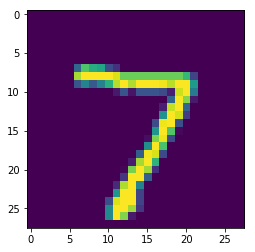

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(test_images [0])
test_images = test_images.astype('float32') / 255
img = test_images[0].reshape((1, 28 * 28))
print(network.predict(img))

*  `plt.imshow(...)`: Cette fonction de la bibliothèque `matplotlib` sert à afficher une image.
*  `test_images.astype('float32')`: On convertit les valeurs des pixels de l'image (qui étaient probablement des entiers) en nombres décimaux de type "float32".
*  `/ 255`: On divise chaque valeur de pixel par 255. C'est une étape de normalisation. Les pixels d'une image sont généralement représentés par des valeurs entre 0 et 255. En divisant par 255, on ramène toutes les valeurs entre 0 et 1. Cela aide le réseau neuronal à apprendre plus efficacement.
*  `.reshape((1, 28 * 28))`: On change la forme de l'image. On la transforme d'une matrice 28x28 en un vecteur de 784 éléments (28 * 28 = 784). Cette transformation est nécessaire car le réseau neuronal que l'on a défini précédemment attend des données sous cette forme.

## Questions

Pourriez-vous expliquer plus en détail le fonctionnement de la fonction d'activation 'relu' utilisée dans la couche cachée du réseau neuronal ?

Relu (Rectified Linear Unit) est une fonction d'activation qui introduit une non-linéarité dans le réseau, lui permettant d'apprendre des motifs plus complexes. Elle retourne 0 si l'entrée est négative, et l'entrée elle-même si elle est positive.

Pourquoi la fonction d'activation 'softmax' est-elle utilisée dans la couche de sortie ?

Softmax convertit les sorties du réseau en une distribution de probabilité sur les 10 classes, permettant au réseau de prédire la probabilité que l'image appartienne à chaque classe.